In [89]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [90]:
df = pd.read_csv('/Users/cgarg/Documents/UMAFall_Subject_16_Fall_forwardFall_13_2016-06-01_22-30-56.csv',delimiter=';')


In [115]:
print('Sorting by timestamp')
df.sort_values(by=['TimeStamp'])
print(df[['TimeStamp',' X-Axis', ' Y-Axis', ' Sensor ID']].head(25)) 

Sorting by timestamp
    TimeStamp     X-Axis      Y-Axis   Sensor ID
0       107.0   0.182183    0.977138         0.0
1       321.0   0.546794    2.933428         0.0
2       642.0   1.092734    5.869053         0.0
3      1070.0   1.820370    9.785051         0.0
4      1605.0   2.731104   14.683985         0.0
5      2247.0   3.822190   20.565672         0.0
6      2996.0   5.091981   27.428098         0.0
7      3852.0   6.542552   35.270958         0.0
8      4815.0   8.175368   44.096144         0.0
9      5886.0   9.990427   53.906768         0.0
10     7065.0  11.986755   64.701549         0.0
11     8352.0  14.162947   76.481158         0.0
12     9747.0  16.520773   89.244984         0.0
13    11250.0  19.056693  102.992968         0.0
14    12861.0  21.771684  117.724376         0.0
15    14580.0  24.665197  133.439269         0.0
16    16407.0  27.738573  150.138136         0.0
17    18342.0  30.990655  167.818291         0.0
18    20385.0  34.421440  186.479185         0.0

In [116]:
# applying v=u+at
df['v-x'] = 0
df['v-y'] = 0
df['v-z'] = 0
df['Cum-X'] = 0
df['Cum-Y'] = 0
df['Cum-Z'] = 0
for i in range(2, len(df)): 
    df.loc[i, 'v-x'] = df.loc[i-1, 'v-x'] + (df.loc[i-1, ' X-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-X'] = df.loc[i-1, 'Cum-X'] + (df.loc[i, 'v-x'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-y'] = df.loc[i-1, 'v-y'] + (df.loc[i-1, ' Y-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Y'] = df.loc[i-1, 'Cum-Y'] + (df.loc[i, 'v-y'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'v-z'] = df.loc[i-1, 'v-z'] + (df.loc[i-1, ' Z-Axis'] * 9.81* (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))
    df.loc[i, 'Cum-Z'] = df.loc[i-1, 'Cum-Z'] + (df.loc[i, 'v-z'] * (df.loc[i, 'TimeStamp'] - df.loc[i-1, 'TimeStamp']))


print(df[['TimeStamp',' X-Axis', 'v-x', 'Cum-X',' Y-Axis', 'v-y', 'Cum-Y',' Z-Axis', 'v-z', 'Cum-Z']].head(30))

    TimeStamp     X-Axis           v-x         Cum-X      Y-Axis  \
0       107.0   0.182183  0.000000e+00  0.000000e+00    0.977138   
1       321.0   0.546794  0.000000e+00  0.000000e+00    2.933428   
2       642.0   1.092734  1.721861e+03  5.527175e+05    5.869053   
3      1070.0   1.820370  6.309904e+03  3.253356e+06    9.785051   
4      1605.0   2.731104  1.586384e+04  1.174051e+07   14.683985   
5      2247.0   3.822190  3.306439e+04  3.296785e+07   20.565672   
6      2996.0   5.091981  6.114866e+04  7.876819e+07   27.428098   
7      3852.0   6.542552  1.039079e+05  1.677133e+08   35.270958   
8      4815.0   8.175368  1.657155e+05  3.272974e+08   44.096144   
9      5886.0   9.990427  2.516101e+05  5.967718e+08   53.906768   
10     7065.0  11.986755  3.671593e+05  1.029653e+09   64.701549   
11     8352.0  14.162947  5.184977e+05  1.696959e+09   76.481158   
12     9747.0  16.520773  7.123169e+05  2.690641e+09   89.244984   
13    11250.0  19.056693  9.559063e+05  4.127369

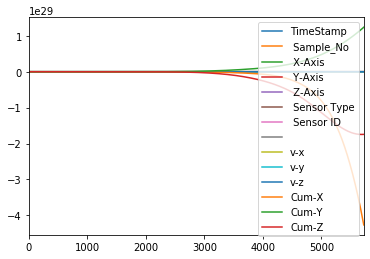

In [117]:
df.plot();

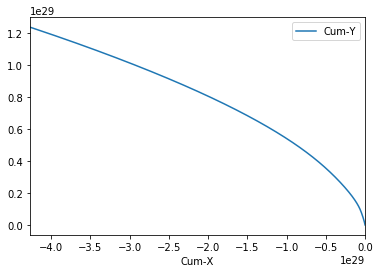

In [118]:
df.plot(x='Cum-X', y='Cum-Y')

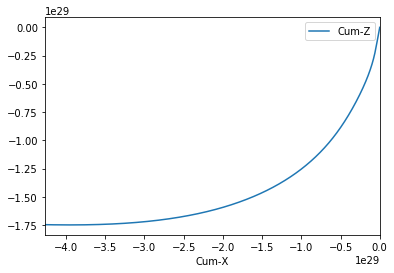

In [112]:
df.plot(x='Cum-X', y='Cum-Z')

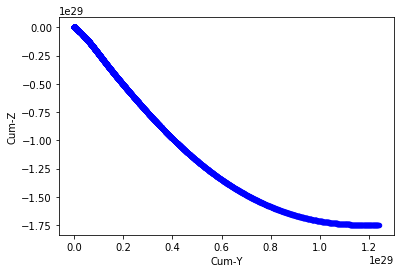

In [113]:
df.plot(kind='scatter',x='Cum-Y',y='Cum-Z',color='blue')

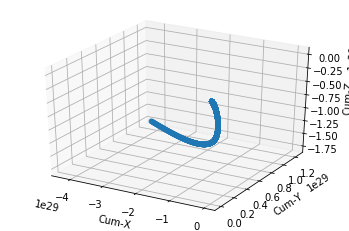

In [114]:
threedee = plt.figure().gca(projection='3d')
threedee.scatter(df['Cum-X'], df['Cum-Y'], df['Cum-Z'])
threedee.set_xlabel('Cum-X')
threedee.set_ylabel('Cum-Y')
threedee.set_zlabel('Cum-Z')
plt.show()